# Convolution Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(image):
    plt.title(f'Image shape : {image.shape}')
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()

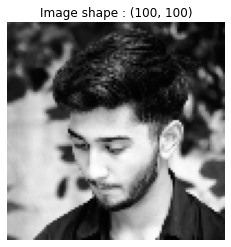

In [3]:
image = cv2.imread('./athar.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(100,100))
drawImg(image)

In [4]:
def convolution(image,img_filter):
    H,W = image.shape
    F = img_filter.shape[0]
    newImg = np.zeros((H-F+1,W-F+1))
    
    for row in range(H-F+1):
        for col in  range(W-F+1):
            for i in range(F):
                for j in range(F):
                    newImg[row][col] += image[row+i][col+j]*img_filter[i][j]
                    
                    if newImg[row][col] > 255:
                        newImg[row][col] = 255
                    elif newImg[row][col] < 0:
                        newImg[row][col] = 0
                    
    
    return newImg
                    

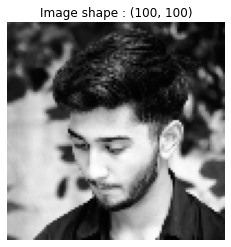

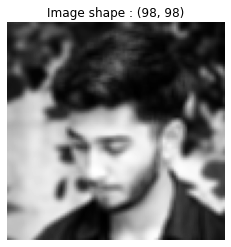

In [5]:
image = cv2.imread('./athar.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image,(100,100))
blur_filter = np.ones((3,3))/9
img_ = convolution(image,blur_filter)
drawImg(image)
drawImg(img_)

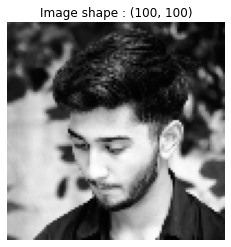

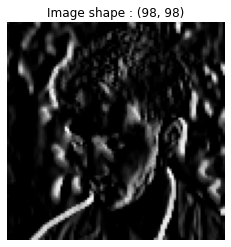

In [6]:
boundary_filter =np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
img_ = convolution(image,boundary_filter)
drawImg(image)
drawImg(img_)

## Padding and strides on image to retain original image shape

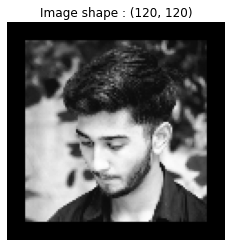

In [7]:
pad_image = np.pad(image,((10,10),(10,10)),mode='constant',constant_values=0)
drawImg(pad_image) ## we can see a padding of 10 X 10 added for both rows and columns 

## Pooling with using stride to pick the most active features

In [13]:
def pooling(X,Filter,stride,mode='max'):
    H,W = X.shape
    F = Filter.shape[0]
    
    HO = int((H - F)/stride) + 1
    WO = int((W - F)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            c_start = c*stride
            
            r_end = r_start + F
            c_end = c_start + F
            
            X_slice = X[r_start:r_end,c_start:c_end]*Filter
            
            if mode == 'max':
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    
    return output

In [21]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

Filter = np.ones((2,2))
pool_output = pooling(X,Filter,2)

In [22]:
print(pool_output)

[[6. 8.]
 [3. 4.]]
